In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:

import os

def find_Class(directory_path):
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory '{directory_path}' does not exist.")
    if not os.path.isdir(directory_path):
        raise ValueError(f"The path '{directory_path}' is not a directory.")

    # Get a list of all entries in the directory
    all_entries = os.listdir(directory_path)

    # Filter out only directories
    folders = [entry for entry in all_entries if os.path.isdir(os.path.join(directory_path, entry))]

    return folders

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

print("Kaggle API is authenticated successfully!")



Kaggle API is authenticated successfully!


In [4]:

DIRECTORY= r"C:\Users\isar\Downloads\DATASET\train"
CATAGORIES= []
try:
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}':")
    for folder in folders:
        CATAGORIES.append(folder)
except ValueError as e:
    print(e)

CATAGORIES
# you can rename these class according to the emotion of the folder

Directories in 'C:\Users\isar\Downloads\DATASET\train':


['1', '2', '3', '4', '5', '6', '7']

In [5]:
data=[]

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)


    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img}")

#         img_arr=cv2.resize(img_arr,(100,100))

#         data.append([img_arr,label])


In [6]:
len(data)

12271

In [7]:
DIRECTORY= r"C:\Users\isar\Downloads\DATASET\test"
for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)


    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img}")

In [8]:
len(data)

15339

In [9]:
random.shuffle(data)
x=[]
y=[]


for features,label in data:
    x.append(features)
    y.append(label)

print(len(x))
print(len(y))

X= np.array(x)
Y=np.array(y)

15339
15339


In [10]:
len(data)
X=X/255
# X

In [11]:
X.shape

(15339, 100, 100, 3)

In [12]:
Y.shape

(15339,)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [14]:
model=Sequential()
model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add( Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(7,activation='softmax'))

c:\Users\isar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
checkpoint=ModelCheckpoint(r'fer.keras',
                          monitor='val_accuracy',
                          mode='max',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_accuracy',
                        mode='max',
                       min_delta=0.001,
                       patience=20,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [16]:
model.fit(X,Y,epochs=50,validation_split=0.25,callbacks =callbacks)

Epoch 1/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.4035 - loss: 1.6147
Epoch 1: val_accuracy improved from -inf to 0.61408, saving model to fer.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 81s 218ms/step - accuracy: 0.4037 - loss: 1.6142 - val_accuracy: 0.6141 - val_loss: 1.0971
Epoch 2/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.6205 - loss: 1.0751
Epoch 2: val_accuracy improved from 0.61408 to 0.66910, saving model to fer.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 73s 203ms/step - accuracy: 0.6205 - loss: 1.0750 - val_accuracy: 0.6691 - val_loss: 0.9546
Epoch 3/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.6805 - loss: 0.9108
Epoch 3: val_accuracy improved from 0.66910 to 0.69153, saving model to fer.keras
360/360 ━━━━━━━━━━━━━━━━━━━━ 73s 202ms/step - accuracy: 0.6805 - loss: 0.9107 - val_accuracy: 0.6915 - val_loss: 0.8925
Epoch 4/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.7317 - loss: 0.7769
Epoch 4: val_accuracy improved from 0.69153 t

KeyboardInterrupt: 

In [19]:
model.save('facial_emotion_recognation.h5')

In [20]:
import os 
print(os.getcwd())

g:\M.m\مهدی\دانشگاه\ترم هفت\هوش مصنوعی\پروژه


In [16]:
from tensorflow.keras.models import load_model

model = load_model('facial_emotion_recognation.h5')  # مسیر فایل مدل


In [ ]:
# تست مدل _ کد تست خود کگل



from keras.preprocessing import image
import numpy as np
import os 
import cv2
img_pred=image.load_img(r"C:\Users\isar\Pictures\Camera Roll\++2.jpg",target_size=(100,100))
plt.imshow(img_pred)
plt.axis('off')  # Turn off the axes
plt.title("Loaded Image")  # Optional: Add a title
plt.show()

#img_pred=image.load_img(r"C:\Users\isar\Desktop\test\4\test_0129_aligned.jpg",target_size=(100,100))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt.round())
print(CATAGORIES[np.argmax(rslt)])

NameError: name 'plt' is not defined

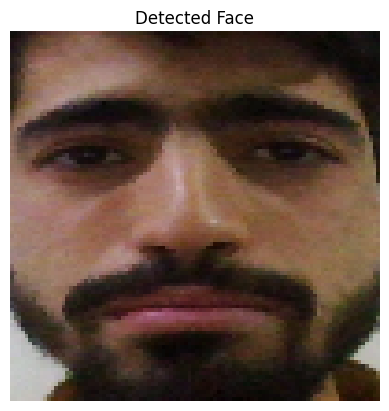

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0. 0. 0. 0. 0. 0. 1.]]
7


In [ ]:
# تست مدل _ کد تست همراه با برش تصویر


from keras.preprocessing import image
import numpy as np
import os 
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

# بارگذاری تصویر
image_path = r"C:\Users\isar\Pictures\Camera Roll\8664.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ایجاد مدل MTCNN
detector = MTCNN()

# تشخیص چهره‌ها
faces = detector.detect_faces(image_rgb)

# بررسی وجود چهره‌ها
if len(faces) == 0:
    raise ValueError("No faces detected in the image.")

# انتخاب اولین چهره تشخیص داده شده
face = faces[0]
x, y, width, height = face['box']
# کاهش محدوده تشخیص داده شده
new_x = x + int(width * 0.05)
new_y = y + int(height * 0.05)
new_width = int(width * 0.95)
new_height = int(height * 1)

# برش تصویر به محدوده چهره
face_image = image_rgb[new_y:new_y + new_height, new_x:new_x + new_width]

# تغییر اندازه تصویر به اندازه مورد نیاز مدل
face_image_resized = cv2.resize(face_image, (100, 100))

# تبدیل تصویر به آرایه
img_pred = np.expand_dims(face_image_resized, axis=0)

# نمایش تصویر برش داده شده
plt.imshow(face_image_resized)
plt.axis('off')  # Turn off the axes
plt.title("Detected Face")  # Optional: Add a title
plt.show()

# پیش‌بینی با مدل
rslt = model.predict(img_pred)

print(rslt.round())
print(CATAGORIES[np.argmax(rslt)])



In [ ]:
#1__suprised
#2__fear
#3__disgust
#4: Happy (خوشحالی)
#5: Sad
#6: angry 
#7: Neutral (خنثی)


In [23]:
#-------------------------------------------------------------------------------------------------------------------------------------#

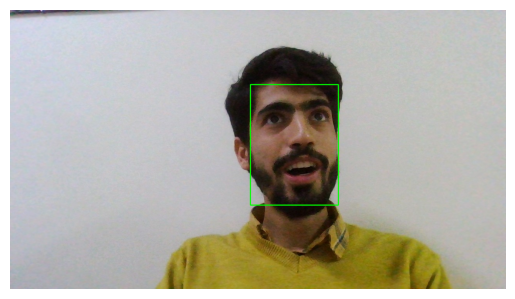

In [ ]:
# کد اضافی برای تحوه ی برش و انتخاب ناحیه ی صورت



import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt
import numpy
# بارگذاری تصویر
image_path = r"C:\Users\isar\Pictures\Camera Roll\08.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ایجاد مدل MTCNN
detector = MTCNN()

# تشخیص چهره‌ها
faces = detector.detect_faces(image_rgb)

# رسم مستطیل دور چهره‌ها با محدوده کوچک‌تر
for face in faces:
    x, y, width, height = face['box']
    # کاهش محدوده تشخیص داده شده
    new_x = x + int(width *0.05)
    new_y = y + int(height * 0.05)
    new_width = int(width * 0.95)
    new_height = int(height * 1)
    cv2.rectangle(image_rgb, (new_x, new_y), (new_x + new_width, new_y + new_height), (0, 255, 0), 2)

# نمایش تصویر با چهره‌های تشخیص داده شده
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
